In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler, SMOTE


In [11]:
# Load your Kaggle Iris dataset
df = pd.read_csv("Data/Iris.csv")

# Drop Id column (not useful for ML)
df = df.drop("Id", axis=1)

# Encode species column
encoder = LabelEncoder()
df["Species_encoded"] = encoder.fit_transform(df["Species"])

# Features and target
X = df.drop(["Species", "Species_encoded"], axis=1)
y = df["Species_encoded"]

print(df.head())
df["Species_encoded"].value_counts()


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


Species_encoded
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
# First split: Train vs Temp (80:20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Validation vs Test (10:10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = np.round(model.predict(X_test)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

# Accuracy
acc_80 = accuracy_score(y_test, preds)
print("Accuracy (80:10:10):", acc_80)


Accuracy (80:10:10): 1.0


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = np.round(model.predict(X_test)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

# Accuracy
acc_70 = accuracy_score(y_test, preds)
print("Accuracy (70:15:15):", acc_70)


Accuracy (70:15:15): 1.0


In [6]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

model = LinearRegression()
model.fit(X_res, y_res)

preds = np.round(model.predict(X_res)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

acc_over = accuracy_score(y_res, preds)
print("Accuracy after Oversampling:", acc_over)


Accuracy after Oversampling: 0.9733333333333334


In [13]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = smote.fit_resample(X, y)

model = LinearRegression()
model.fit(X_res, y_res)

preds = np.round(model.predict(X_res)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

acc_smote_a = accuracy_score(y_res, preds)
print("Accuracy with SMOTE (2 neighbors):", acc_smote_a)


Accuracy with SMOTE (2 neighbors): 0.9733333333333334


In [8]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

model = LinearRegression()
model.fit(X_res, y_res)

preds = np.round(model.predict(X_res)).astype(int)
preds = np.clip(preds, 0, len(np.unique(y))-1)

acc_smote_b = accuracy_score(y_res, preds)
print("Accuracy with SMOTE (nearest neighbor):", acc_smote_b)


Accuracy with SMOTE (nearest neighbor): 0.9733333333333334


Linear Regression (80:10:10): 1.0000
Linear Regression (70:15:15): 1.0000
Oversampling: 0.9733
SMOTE (2 neighbors): 0.9733
SMOTE (nearest neighbor): 0.9733


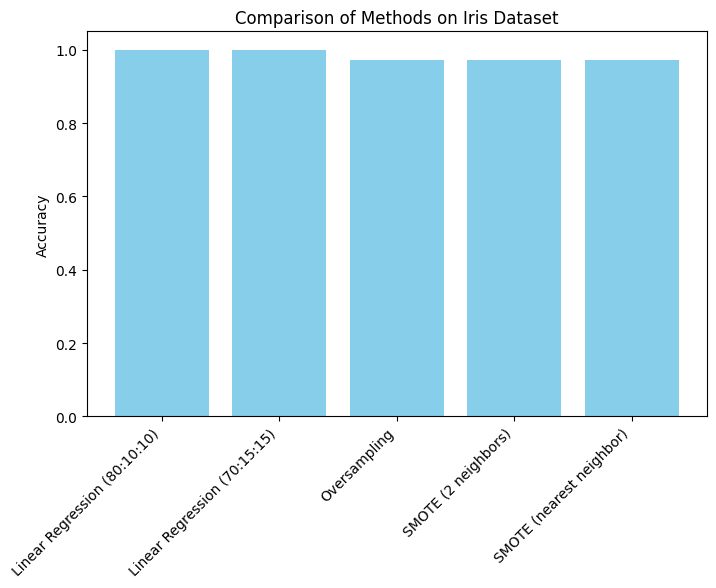

In [9]:
results = {
    "Linear Regression (80:10:10)": acc_80,
    "Linear Regression (70:15:15)": acc_70,
    "Oversampling": acc_over,
    "SMOTE (2 neighbors)": acc_smote_a,
    "SMOTE (nearest neighbor)": acc_smote_b
}

for method, acc in results.items():
    print(f"{method}: {acc:.4f}")

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Comparison of Methods on Iris Dataset")
plt.show()
